<a href="https://colab.research.google.com/github/jjoy896/BA64060_jjoy6/blob/main/Book_examples_CH3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

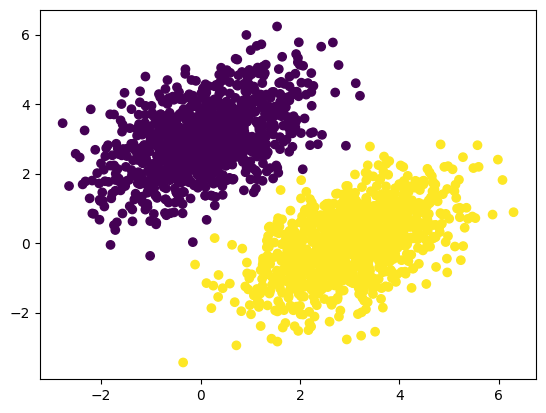

In [2]:
num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(mean = [0, 3], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean = [3, 0], cov = [[1, 0.5], [0.5, 1]], size = num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)) .astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class,1), dtype="float32")))

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Loss at step 0: 1.5060
Loss at step 1: 0.1796
Loss at step 2: 0.1084
Loss at step 3: 0.0933
Loss at step 4: 0.0863
Loss at step 5: 0.0810
Loss at step 6: 0.0762
Loss at step 7: 0.0718
Loss at step 8: 0.0678
Loss at step 9: 0.0642
Loss at step 10: 0.0608
Loss at step 11: 0.0578
Loss at step 12: 0.0550
Loss at step 13: 0.0524
Loss at step 14: 0.0501
Loss at step 15: 0.0479
Loss at step 16: 0.0460
Loss at step 17: 0.0442
Loss at step 18: 0.0425
Loss at step 19: 0.0410
Loss at step 20: 0.0397
Loss at step 21: 0.0384
Loss at step 22: 0.0372
Loss at step 23: 0.0362
Loss at step 24: 0.0352
Loss at step 25: 0.0343
Loss at step 26: 0.0335
Loss at step 27: 0.0328
Loss at step 28: 0.0321
Loss at step 29: 0.0315
Loss at step 30: 0.0309
Loss at step 31: 0.0304
Loss at step 32: 0.0300
Loss at step 33: 0.0295
Loss at step 34: 0.0291
Loss at step 35: 0.0288
Loss at step 36: 0.0284
Loss at step 37: 0.0281
Loss at step 38: 0.0279
Loss at step 39: 0.0276
Loss at step 40: 0.0274
Loss at step 41: 0.0272
Lo

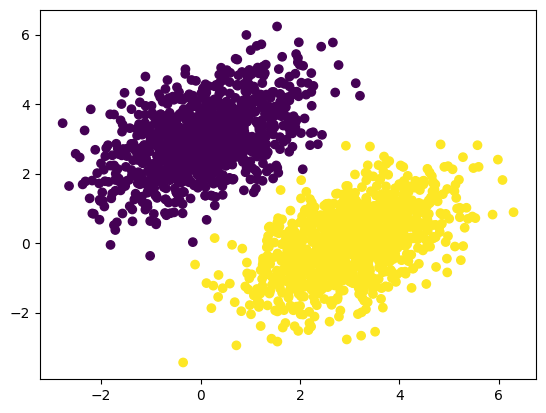

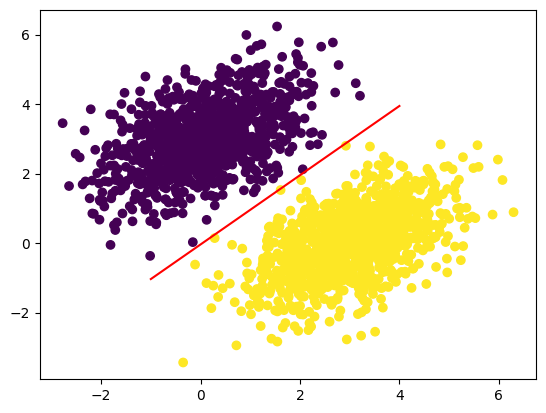

In [7]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(100):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()